###IMPORTING LIBRARIES

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis


##LOAD DATASET

In [91]:
df=pd.read_csv('/content/top_100_bowlers_with_names.csv')

In [92]:
df.head()

,Bowler,Matches,Innings,Wickets,Average,Economy,StrikeRate
0,Muttiah Muralitharan,152,202,274,29.06,5.53,59.27
1,Shane Warne,398,328,434,30.69,2.56,52.82
2,Anil Kumble,320,300,452,28.84,2.96,29.55
3,Wasim Akram,156,270,687,22.30,2.68,28.78
4,Glenn McGrath,121,80,179,33.89,2.66,56.54


In [93]:
df.shape

(100, 7)

In [94]:
df.dtypes

,0
Bowler,object
Matches,int64
Innings,int64
Wickets,int64
Average,float64
Economy,float64
StrikeRate,float64


##SCALING DATA
standard scaling is the data processing technique use to normalize features so they have

mean = 0

standard deviation = 1

###PURPOSE
we use scaling data when our column have very different ranges like in our dataset we have innings and centuries

so when we use K-mean , logestic regression , svm and neutral networds they use distance caluculation like which player is close to which cluster

And if we dont scale it , it might give ranking according to the highest inning numbers because it look bigger then centuries so its no fair

###CONCEPT
The StandardScaler function in scikit-learn is basically a data normalizer — its whole job is to take your numeric features and put them on a standard scale where:

 Mean = 0
 Standard deviation = 1


###STEP BY STEP hOW WE CALCuLATE SD
Data: [51, 38, 32]

Mean
μ=(51+38+32)/3=40.3



Now calculate variance:

(51−40.3)2+(38−40.3)2+(32−40.3)2


  =

114.5+5.3+68.9=188.7

Variance=188.7/3=62.9
σ=62.9

after taking underroot
now it is 7.9


In [95]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Matches','Innings','Wickets','Average','Economy','StrikeRate']])

###BELOW CODE
that scaler part of code it Scale only numeric columns
and that kmean area Build KMeans model with 7 clusters like 7 groups adn init choose the initial cluster center so the algorithm work faster
and random_sate this because everytime we run the code the result will be same without this the random starting point mat change after every run
and label Add cluster labels back to the original DataFrame

In [96]:


kmeans = KMeans(n_clusters=7, random_state=42, init='k-means++', n_init=10)
labels = kmeans.fit_predict(df_scaled)

df['Cluster'] = labels

df.head()

,Bowler,Matches,Innings,Wickets,Average,Economy,StrikeRate,Cluster
0,Muttiah Muralitharan,152,202,274,29.06,5.53,59.27,2
1,Shane Warne,398,328,434,30.69,2.56,52.82,0
2,Anil Kumble,320,300,452,28.84,2.96,29.55,6
3,Wasim Akram,156,270,687,22.30,2.68,28.78,1
4,Glenn McGrath,121,80,179,33.89,2.66,56.54,3


##Choosing the Optimal Number of Clusters in KMeans (Elbow Method)

When performing KMeans clustering, we must decide the number of clusters (k) to use. If k is too small, different groups may get merged into one cluster. If k is too large, one natural group may be split into many small clusters. To find the most suitable k, we can use the Elbow Method.

##ELBOW METHOD
🔹 Why we need it?

When we cluster cricket bowlers with KMeans, we must tell it how many clusters (k) we want.

If k is too small → different bowling styles (pace, spin, swing) get merged.

If k is too big → one natural group (e.g., fast bowlers) gets broken into too many tiny groups.

###WHAT KMEAN CHHECKS
KMeans measures how close each bowler is to their group center (cluster centroid).

If bowlers are very close to their centroid → small distance (good clustering).

If bowlers are far from their centroid → large distance (bad clustering).

##How the Elbow works

As we increase k, the distance (inertia) always decreases because more groups mean bowlers are closer to their cluster center.

But after a certain point, the improvement becomes very small.

The curve looks like an arm, and the point where it bends is called the elbow.

###CODE LOGIC
At k = 1 → All bowlers are forced into one group → very high distance (bad).

From k = 1 to k = 7 → The inertia drops significantly because bowlers are divided into more natural groups

After k = 7 → The curve flattens — adding more clusters does not reduce the distance much

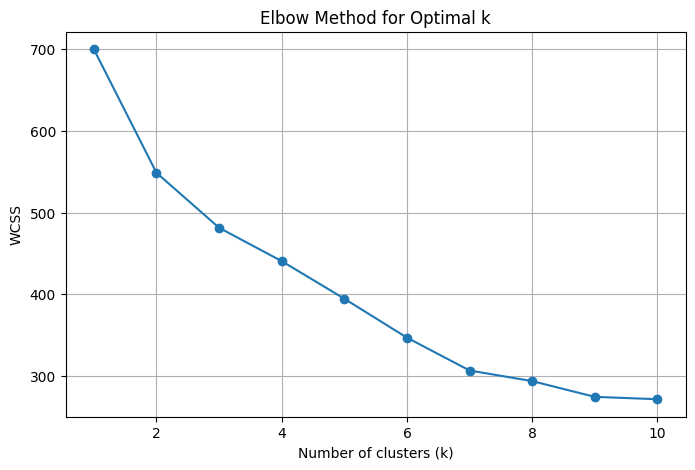

In [118]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

##What is the Problem?

When we do KMeans clustering, we must decide how many clusters (k) we should have.
Too few clusters → groups are too broad.
Too many clusters → groups become meaningless.

###The Silhouette Method

The Silhouette Method checks how good the clusters are by looking at two things for each point:

a = How close a point is to other points in its own cluster.
→ (We want this to be small, meaning the cluster is compact/tight.)

b = How far that point is from the nearest other cluster.
→ (We want this to be big, meaning the clusters are far apart.)

 Then we combine these two into the Silhouette Score:


Silhouette Score=b−a/max⁡(a,b)



If the score is close to 1 → The point is well-clustered (good).

If the score is around 0 → The point lies between two clusters (uncertain).

If the score is negative → The point is probably in the wrong cluster.

Finally, we take the average score of all points → this tells us how good the whole clustering is

###Why it Works

Elbow Method only checks how tight the clusters are inside (inertia).

Silhouette Method checks both:

How tight the clusters are (compactness).

How far apart clusters are (separation).

###WHAT CODE DOES
his code visualizes how KMeans divides cricket bowlers into 7 groups based on Matches and Strike Rate.
Each group shows a different pattern of bowlers — for example, some clusters represent highly experienced strike bowlers, while others show less experienced or defensive bowlers.

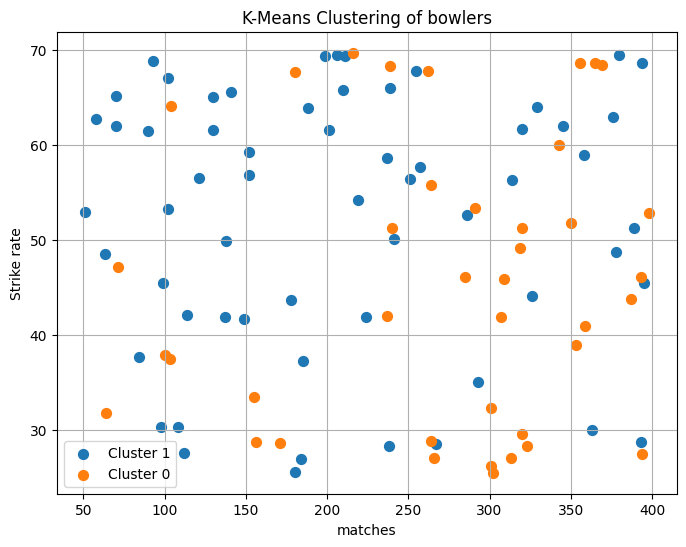

In [119]:
plt.figure(figsize=(8, 6))

# Plot each cluster
for cluster in df['Cluster'].unique():
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Matches'],
                cluster_points['StrikeRate'],
                label=f'Cluster {cluster}',
                s=50)


# Titles and labels
plt.title('K-Means Clustering of bowlers')
plt.xlabel('matches')
plt.ylabel('Strike rate')
plt.legend()
plt.grid(True)
plt.show()

###WHAT CODE
in this we know about the curve where it is so  we came to know after this how it works

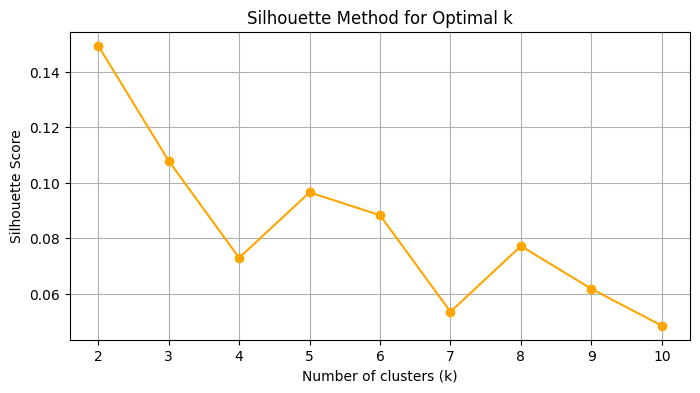

In [104]:
silhouette_scores = []

for k in range(2, 11):  # silhouette is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

##Profiling Kmeans Clusters
it means understanding and describing each cluster after you have assigned your data point to them like cluster profile table , visualization , cluster sizes

###BELOW CODE
in below code we can see the bars like how much strike rate every bowler have and the matches he played and how much wickets he takes through is graph

Cluster Profile Table (mean values per cluster):
         Matches  Innings  Wickets  Average  Economy  StrikeRate  Cluster
Cluster                                                                  
0         271.25   275.00   509.15    31.37     4.65       45.29      0.0
1         209.55   162.08   266.90    28.30     4.35       52.26      1.0

Cluster Sizes:
Cluster
1    60
0    40
Name: count, dtype: int64


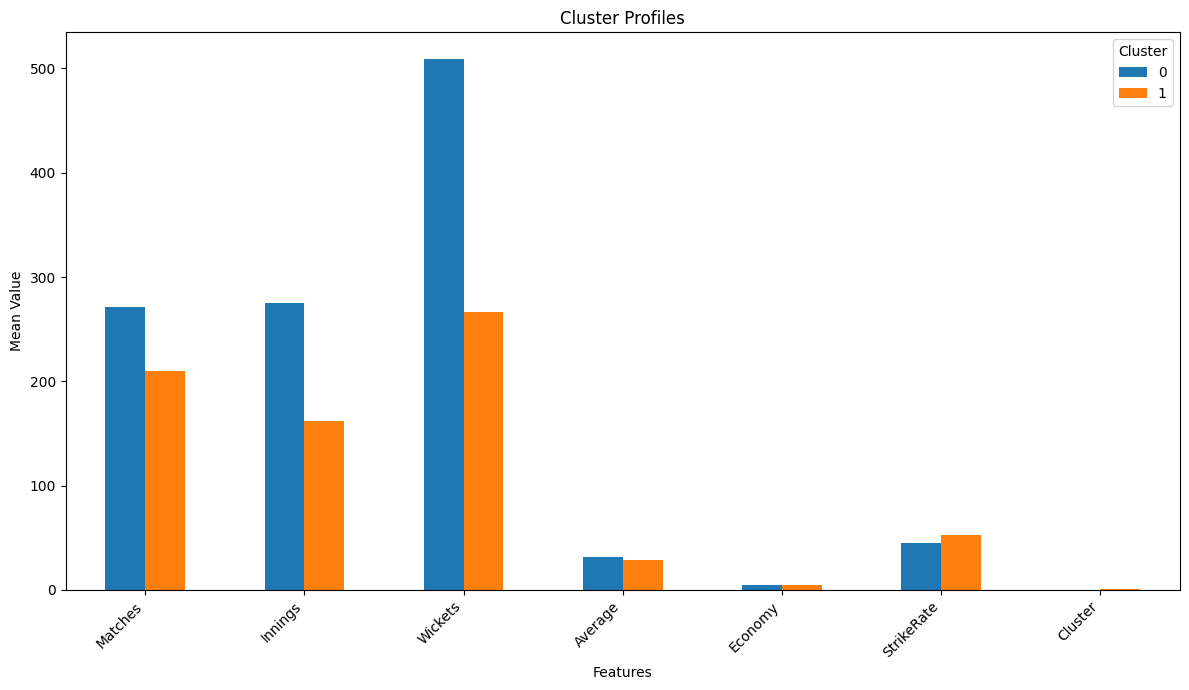

In [106]:
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++', n_init=10)
kmeans.fit(df_scaled)

df['Cluster'] = kmeans.labels_

numeric_cols = df.select_dtypes(include=np.number).columns
cluster_profile = df.groupby('Cluster')[numeric_cols].mean().round(2)

print("Cluster Profile Table (mean values per cluster):")
print(cluster_profile)

print("\nCluster Sizes:")
print(df['Cluster'].value_counts())

cluster_profile.T.plot(kind='bar', figsize=(12, 7))
plt.title("Cluster Profiles")
plt.ylabel("Mean Value")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##PCA
PCA is a way to summarize many stats into a few new stats called Principal Components (PCs).

Instead of looking at Runs, Strike Rate, Average, Sixes one by one → PCA makes 2–3 main numbers that explain most of the differences between players.
Each player has many stats → Runs, StrikeRate, Average, Balls, 4s, 6s, DotBall%.

Many stats move together (more Balls → usually more Runs).

Too many stats = hard to compare. PCA solves this.

###What PCA Does

PC1 = biggest difference between players (main pattern).
Often means “overall volume/consistency”.

PC2 = second difference, independent of PC1.
 Often means “aggression/pace”.

###PC1 & PC2 in PCA

PC1 = main direction of variation (biggest difference in data).

PC2 = second biggest difference, independent of PC1

###How to interpret PC1 & PC2 together

PC1 explains most of the variance (~87.8% from your earlier result) and is dominated by overall size.

PC2 explains less (~8.5%) and is more about shape differences

###What the Code Does

Takes all cricket stats (numeric columns).

Puts them on the same scale (so big numbers like Runs don’t dominate small ones like Strike Rate).

Makes PC1 and PC2 (new summary stats).

Checks how much information PC1 and PC2 keep (Explained Variance).

Makes a Scree Plot → shows which PCs are most useful.

Finds Loadings → tells which cricket stat is most important for PC1 and PC2.

        PC1       PC2                Bowler
0  1.625344  0.324366  Muttiah Muralitharan
1 -2.184838  0.156315           Shane Warne
2 -2.057681 -0.100159           Anil Kumble
3 -1.234376  0.839639           Wasim Akram
4  1.014658 -2.017803         Glenn McGrath
Explained variance ratio: [0.30007951 0.17026342]
Total variance captured: 0.4703429284585291


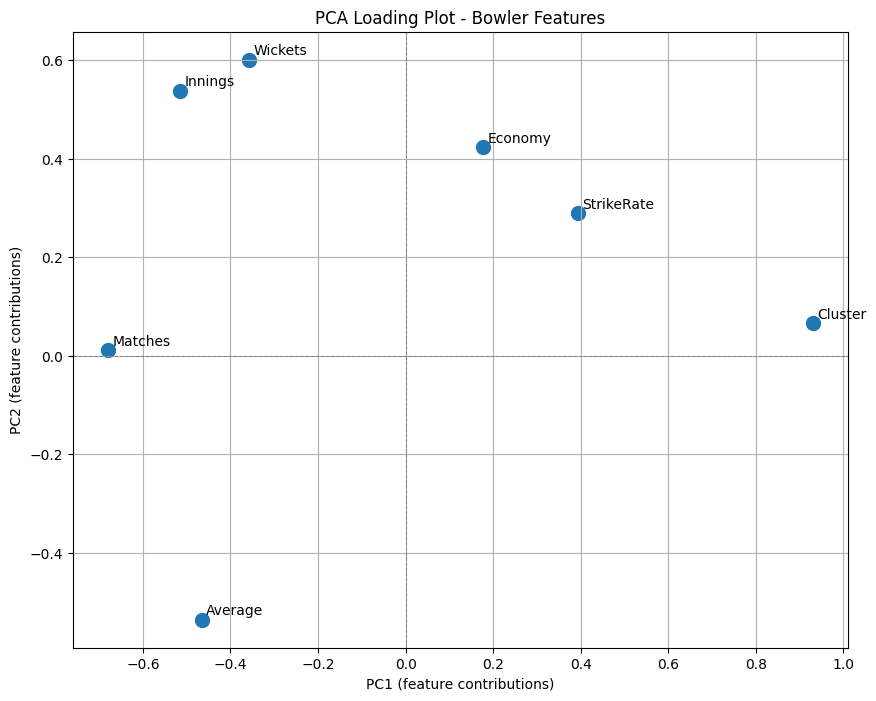

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

player_col = "Bowler"
df_num = df.drop(columns=[player_col], errors='ignore').select_dtypes(include=np.number).copy()

df_num = df_num.fillna(df_num.median(numeric_only=True))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

pca = PCA(n_components=2, random_state=42)
pc_scores = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pc_scores, columns=['PC1', 'PC2'])
if player_col in df.columns:
    pca_df[player_col] = df[player_col].values

print(pca_df.head())

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", pca.explained_variance_ratio_.sum())

features = df_num.columns

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)



plt.figure(figsize=(10,8))
plt.scatter(loadings[:,0], loadings[:,1], s=100)
for i, feat in enumerate(features):
    plt.text(loadings[i,0]+0.01, loadings[i,1]+0.01, feat, fontsize=10)

plt.axhline(0, linestyle='--', linewidth=0.7, color='grey')
plt.axvline(0, linestyle='--', linewidth=0.7, color='grey')
plt.title('PCA Loading Plot - Bowler Features')
plt.xlabel('PC1 (feature contributions)')
plt.ylabel('PC2 (feature contributions)')
plt.grid(True)
plt.show()

Explained Variance Ratio: [0.30007951 0.17026342]
Total Variance Captured: 0.4703429284585291


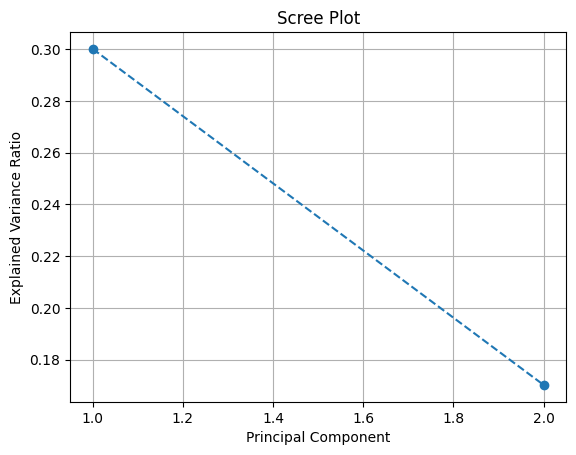


Feature Loadings:
                  PC1       PC2
Matches    -0.466594  0.010080
Innings    -0.353951  0.490161
Wickets    -0.244985  0.547440
Average    -0.319291 -0.488346
Economy     0.121744  0.385445
StrikeRate  0.270463  0.263257
Cluster     0.638023  0.059966

Strong Loadings (>|0.35|):
                  PC1       PC2
Matches    -0.466594       NaN
Innings    -0.353951  0.490161
Wickets          NaN  0.547440
Average          NaN -0.488346
Economy          NaN  0.385445
StrikeRate       NaN       NaN
Cluster     0.638023       NaN


In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

X = df.select_dtypes(include=np.number)

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pcs, columns=['PC1','PC2'])
pca_df['Bowler'] = df['Bowler']

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured:", pca.explained_variance_ratio_.sum())

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=X.columns)

print("\nFeature Loadings:\n", loadings)

print("\nStrong Loadings (>|0.35|):\n", loadings.where(abs(loadings) >= 0.35))

##Implementing Factor Analysis on multiple variables



In [ ]:


from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo



In [ ]:
%pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=33077c4869da882095e5ce81100b0f55e6e0232ab16fb42e7697ce2b727fbcc1
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


###Check for multicollinearity
Multicollinearity means two or more features (columns) give almost the same information.


Correlation Matrix:
              Matches   Innings   Wickets   Average   Economy  StrikeRate  \
Matches     1.000000  0.169265  0.116707  0.160770 -0.065722   -0.028215   
Innings     0.169265  1.000000  0.204331 -0.055040 -0.028382   -0.040611   
Wickets     0.116707  0.204331  1.000000  0.000174  0.073437   -0.043177   
Average     0.160770 -0.055040  0.000174  1.000000 -0.047087   -0.096744   
Economy    -0.065722 -0.028382  0.073437 -0.047087  1.000000    0.068440   
StrikeRate -0.028215 -0.040611 -0.043177 -0.096744  0.068440    1.000000   
Cluster    -0.561179 -0.413216 -0.219505 -0.413660  0.121814    0.345318   

             Cluster  
Matches    -0.561179  
Innings    -0.413216  
Wickets    -0.219505  
Average    -0.413660  
Economy     0.121814  
StrikeRate  0.345318  
Cluster     1.000000  


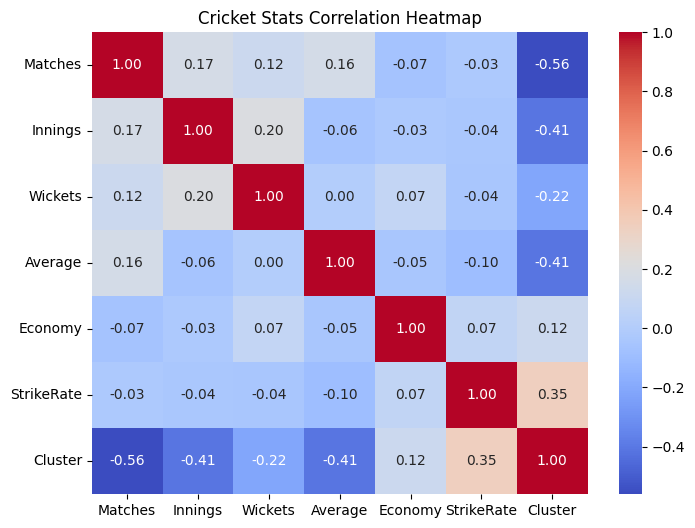

In [69]:
corr_matrix = df.drop(columns=['Bowler']).corr()

print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cricket Stats Correlation Heatmap")
plt.show()


###WHAT CODE DOES
Removes Player name (non-numeric).

Finds correlations above 0.9 (very strong relation), but not 1 (because correlation of a feature with itself is always 1).

Prints a smaller table → shows only those pairs of stats that are almost the same.

Example: Runs and BallsFaced might show 0.95.

Means → players who face more balls almost always score more runs.

Plots a heatmap → highlights only those too-strong relations in red shades.

High correlations (>|0.9| and < 1):
Empty DataFrame
Columns: []
Index: []


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


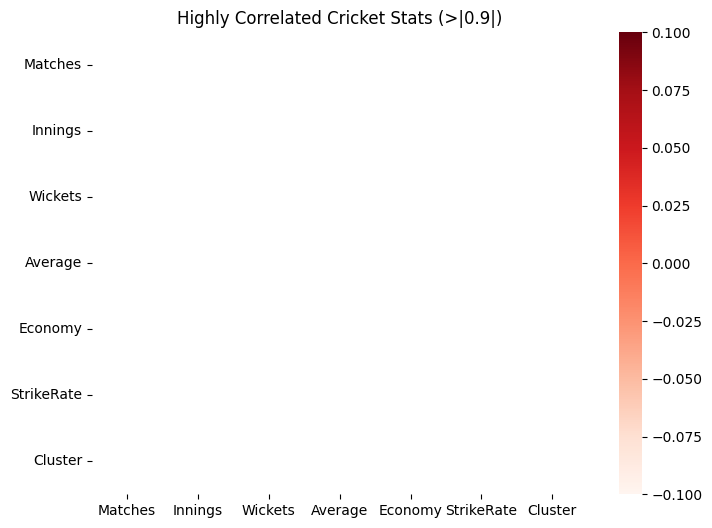

In [68]:
numeric_cols_for_corr = ['Matches','Innings','Wickets','Average','Economy','StrikeRate', 'Cluster']
corr_matrix = df[numeric_cols_for_corr].corr()

high_corr = corr_matrix[(corr_matrix.abs() > 0.9) & (corr_matrix.abs() < 1)]

print("High correlations (>|0.9| and < 1):")
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))

plt.figure(figsize=(8,6))
sns.heatmap(high_corr, annot=True, cmap='Reds', fmt=".2f", mask=high_corr.isnull())
plt.title("Highly Correlated Cricket Stats (>|0.9|)")
plt.show()

##1 Check multicollinearity (do features say the same thing?)

We look at the correlation matrix.

If two features have correlation >|0.90|, they’re almost duplicates (redundant)

In [76]:
numeric_cols_for_corr = ['Matches','Innings','Wickets','Average','Economy','StrikeRate', 'Cluster'] #
corr = df[numeric_cols_for_corr].corr()
print("Correlation Matrix:\n", corr.round(3))


Correlation Matrix:
             Matches  Innings  Wickets  Average  Economy  StrikeRate  Cluster
Matches       1.000    0.169    0.117    0.161   -0.066      -0.028   -0.282
Innings       0.169    1.000    0.204   -0.055   -0.028      -0.041   -0.063
Wickets       0.117    0.204    1.000    0.000    0.073      -0.043   -0.545
Average       0.161   -0.055    0.000    1.000   -0.047      -0.097   -0.170
Economy      -0.066   -0.028    0.073   -0.047    1.000       0.068   -0.198
StrikeRate   -0.028   -0.041   -0.043   -0.097    0.068       1.000    0.400
Cluster      -0.282   -0.063   -0.545   -0.170   -0.198       0.400    1.000


In [79]:

high = corr[(corr.abs() > 0.90) & (corr.abs() < 1.00)]
print("\nVery Strong Correlations (>|0.90|):\n",
      high.dropna(how='all').dropna(axis=1, how='all').round(3))



Very Strong Correlations (>|0.90|):
 Empty DataFrame
Columns: []
Index: []


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


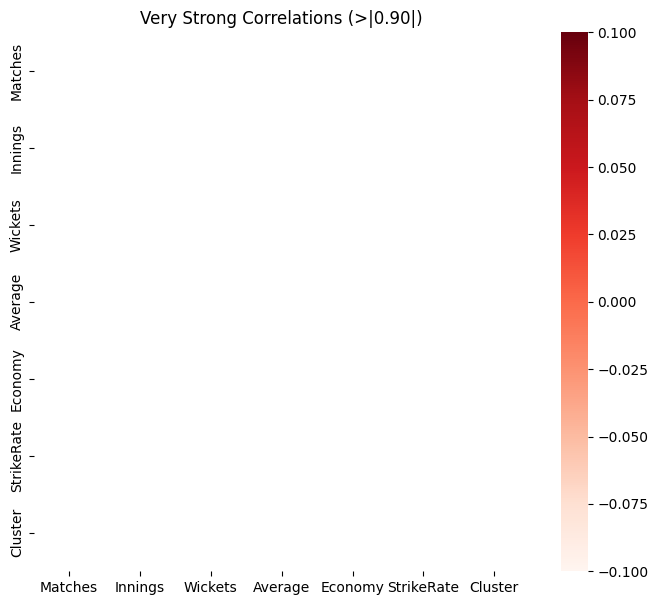

In [80]:

plt.figure(figsize=(8,7))
sns.heatmap(high, annot=True, cmap="Reds", fmt=".2f", mask=high.isnull())
plt.title("Very Strong Correlations (>|0.90|)")
plt.show()

##2 Check if PCA/FA is suitable (KMO test)

KMO asks: “Do these variables share enough common patterns to be summarized into fewer dimensions?”

Higher is better (≥ 0.6 OK, ≥ 0.7 good, ≥ 0.8 great).

In [59]:
from factor_analyzer.factor_analyzer import calculate_kmo

df_numeric = df.select_dtypes(include=np.number)
kmo_all, kmo_model = calculate_kmo(df_numeric)
print(f"KMO (overall): {kmo_model:.3f}  ->  ≥0.7 is good")

KMO (overall): 0.446  ->  ≥0.7 is good


###3 Do PCA (compress info)

PC1 = biggest overall pattern

PC2 = second pattern (often runs )

Explained variance tells how much information PCs keep your runs showed ≈ 88% + 8% ≈ 96%

###4 Decide how many components (Scree + elbow)

Make a Scree plot of explained variance.

A big drop after PC1 = elbow → most structure is in PC1; PC2 adds a bit; others are tiny

###5 Factor Analysis (FA) for interpretable “latent factors”

FA with varimax rotation gives factors that are easier to name

###6How many factors? (Eigenvalue > 1, Scree, Cumulative variance)

Kaiser rule: keep factors with eigenvalue > 1.

###7 Communalities (how well factors explain each variable)

Close to 1 = the factors explain that variable very well

In [49]:
%pip install factor_analyzer

###BWLOW CODE
we know about the pc1 and pc2 as u can see in our output

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

player_col = "Bowler"
df_num = df.drop(columns=[player_col], errors='ignore').select_dtypes(include=np.number).copy()

df_num = df_num.fillna(df_num.median(numeric_only=True))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

pca = PCA(n_components=2, random_state=42)
pc_scores = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pc_scores, columns=['PC1', 'PC2'])
if player_col in df.columns:
    pca_df[player_col] = df[player_col].values

print(pca_df.head())

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", pca.explained_variance_ratio_.sum())


        PC1       PC2                Bowler
0  1.212055 -0.753383  Muttiah Muralitharan
1 -0.037033  1.112485           Shane Warne
2 -1.480834  0.946151           Anil Kumble
3 -1.068492 -0.344912           Wasim Akram
4  1.446266  1.379702         Glenn McGrath
Explained variance ratio: [0.27214869 0.168244  ]
Total variance captured: 0.4403926950296658


###BELOW CODE
in this we know about the most average , matches etc from the dots how much it is higher it means that much players have this milestone

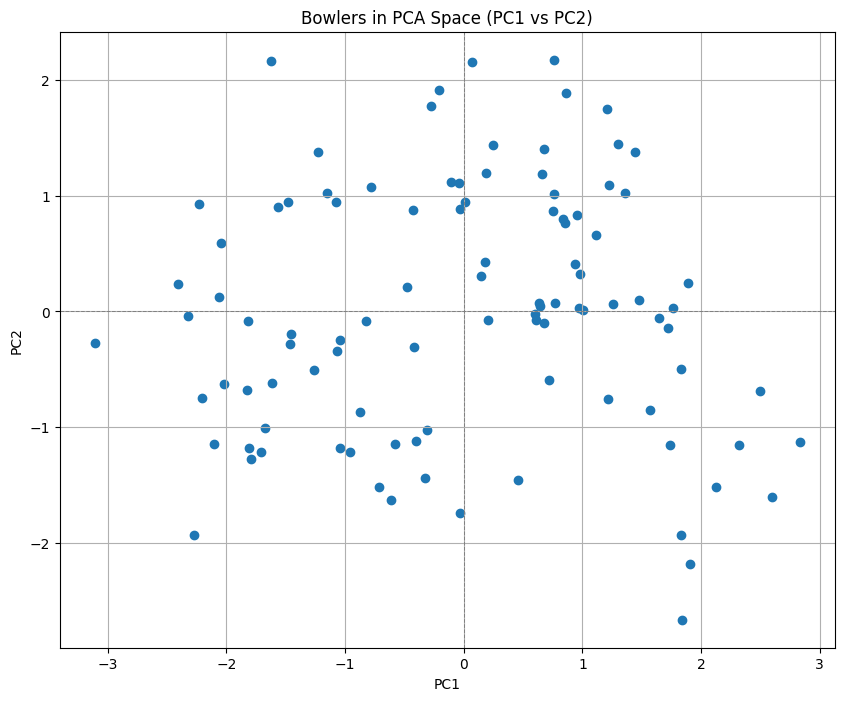

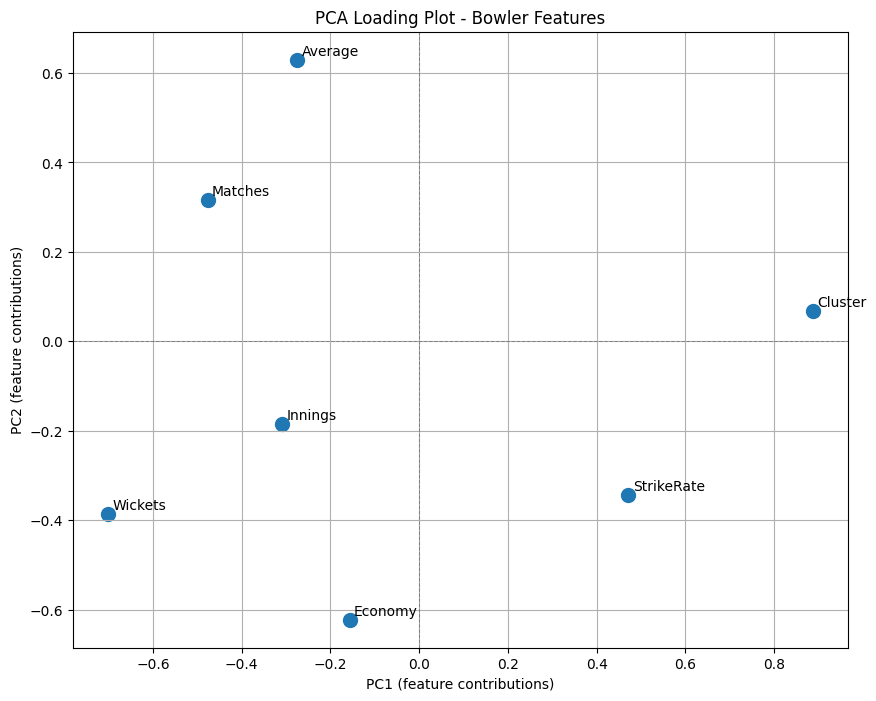

In [82]:

features = df_num.columns

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(10,8))
plt.scatter(pca_df['PC1'], pca_df['PC2'])

plt.axhline(0, linestyle='--', linewidth=0.7, color='grey')
plt.axvline(0, linestyle='--', linewidth=0.7, color='grey')
plt.title('Bowlers in PCA Space (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(loadings[:,0], loadings[:,1], s=100)
for i, feat in enumerate(features):
    plt.text(loadings[i,0]+0.01, loadings[i,1]+0.01, feat, fontsize=10)

plt.axhline(0, linestyle='--', linewidth=0.7, color='grey')
plt.axvline(0, linestyle='--', linewidth=0.7, color='grey')
plt.title('PCA Loading Plot - Bowler Features')
plt.xlabel('PC1 (feature contributions)')
plt.ylabel('PC2 (feature contributions)')
plt.grid(True)
plt.show()